# Lecture 7: Unconstrained optimization, 1D search methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from func import Func
from search1d import GoldenSectionSearch, FibonacciSearch, NewtonSearch

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

We are interested in the problem of minimizing an objective function $f : \mathbb{R} \to \mathbb{R}$ (i.e., a one-dimensional problem)

There are multiple search method for 1D:
- Golden section Search ($f$). Slow but slow and robust.
- Newton Method more efficient but needs more information ($f, f', f^{''}$)

## Golden Section Search

<img src="figures/lecture-07/figure-7.1.png" width="400" />


The Golden Section Search allows us to determine the minimizer of an objective function $f: \mathbb{R} \to \mathbb{R}$ over a closed interval, say $[a_0, b_0]$ The only property that we assume of the objective function $f$ is that it is **unimodal**, which means that $f$ has only one local minimizer in that interval.

Before starting the algorithm, we have to make sure that the unimodel. 

The idea is not to find the exact value. We want to make the uncertaintly interval smaller and smaller and stop the that interval is of relatively small size.

<img src="figures/lecture-07/figure-7.3.png" width="600" />


We choose two intermediate points in such a way that an approximation to the minimizer of $f$ may be achieved in as few evaluations as possible. We choose the intermediate points $a_1$ and $b_1$ in such a way that the reduction in the range
is symmetric:

$$
a_1 = a_0 + \rho(b_0 - a_0)\\
b_1 = a_0 + (1-\rho)(b_0 - a_0)
$$

where the symbols $\rho$ and $1-\rho$ (the Golden ration) are constants:

$$
\rho = \frac{3- \sqrt{5}}{2} \approx 0.382, \hspace{5mm} 1-\rho=\frac{\sqrt{5}-1}{2} \approx 0.61803
$$

Next, we evaluate $f$ at the two intermediate points $a_1$ and $b_1$ i.e., $f(a_1)$ and $f(b_1)$.

- If $f(a_1) < f(b_1)$ then we continue with the next iteration from the interval $[a_0, b_1]$
- If $f(a_1) > f(b_1)$ then we continue with the next iteration from the interval $[a_1, b_0]$

<img src="figures/lecture-07/figure-7.4.png" width="600" />


In the Golden Section Search, the size of the next interval is fixed. The value of $\rho$ is fixed. 

The length of the interval is 1 (otherwise just make it so it is 1).



---
## Example 7.1

<img src="figures/lecture-07/example-7.1.png" width="600" />


In [2]:
def create_example71():
    x = sy.symbols('x')
    f = x**4 - 14*x**3 + 60*x**2 - 70*x
    return GoldenSectionSearch(f, x, initial_range=(0,2), uncertainty=0.3)

example71 = create_example71()

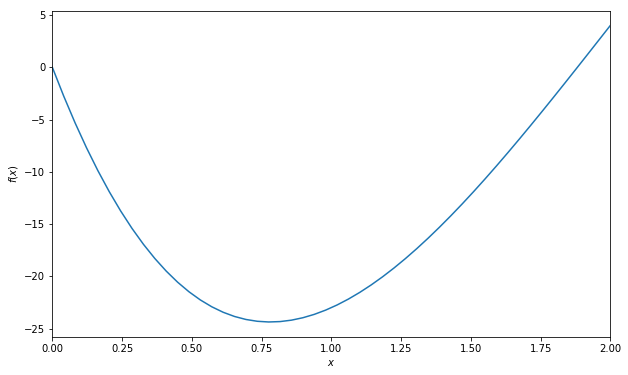

In [3]:
example71.plot()

In [4]:
example71.estimate_iterations()

In [5]:
example71.run(num_iterations=4)

$k$,$a_k$,$b_k$,$f(a_k)$,$f(b_k)$,Uncertainty interval
1,0.7639,1.2361,-24.3607,-18.9582,"[0.0000, 1.2361]"
2,0.4721,0.7639,-21.0985,-24.3607,"[0.4721, 1.2361]"
3,0.7639,0.9443,-24.3607,-23.5925,"[0.4721, 0.9443]"
4,0.6525,0.7639,-23.8374,-24.3607,"[0.6525, 0.9443]"


---
## Fibonacci Search

In the Fib search, we do not insist on a fixed $\rho$ in each iteration. In each iteration $k$, we compute a new $\rho_k$. 

In the long run, the Fib search method is more efficient than the Golden Search method.

<img src="figures/lecture-07/figure-7.5.png" width="600" />


<img src="figures/lecture-07/slide-6.png" width="600" />


We want to minimize the uncertainty range because $(1-\rho_k)$ is the reduction of the uncertainty range for iteration $k$. Multiplying them together, we find the reduction of the uncertainty range for $N$ iterations.

---
## Bisection Method

The idea is to split the interval in the middle $(b_0-a_0)/2$. Then we compute the derivative of that point $f'((b_0-a_0)/2)$. If the slope is negative then pick the right interval otherwise pick the left interval.

Normally, the derivative is error-prone. It is more efficent. In each iteration, we reduce the interval by half. 

---
## Example 7.2

<img src="figures/lecture-07/example-7.2.png" width="600" />


In [6]:
def create_example72():
    x = sy.symbols('x')
    f = x**4 - 14*x**3 + 60*x**2 - 70*x
    return FibonacciSearch(f, x, initial_range=(0, 2), uncertainty=0.3, epsilon=0.05)
example72 = create_example72()

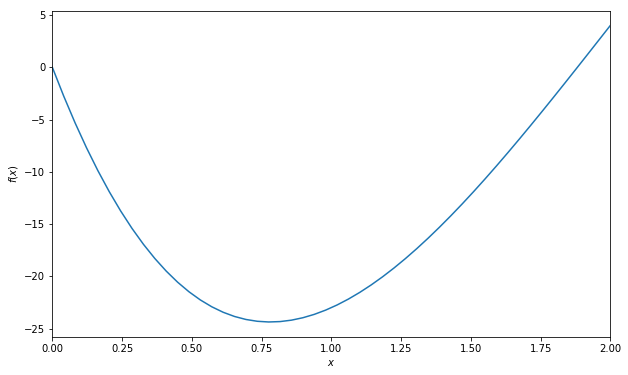

In [7]:
example72.plot()

In [8]:
example72.estimate_iterations()

In [9]:
example72.run(num_iterations=4)

$k$,$a_k$,$b_k$,$f(a_k)$,$f(b_k)$,Uncertainty interval
1,0.7500,1.2500,-24.3398,-18.6523,"[0.0000, 1.2500]"
2,0.5000,0.7500,-21.6875,-24.3398,"[0.5000, 1.2500]"
3,0.7500,1.0000,-24.3398,-23.0000,"[0.5000, 1.0000]"
4,0.7250,0.7500,-24.2713,-24.3398,"[0.7250, 1.0000]"


---
## Lecture Example

Try out the first 2 iteration of the Golden Search method for the function $f(x) = x^2 - 2x + 2$ on the interval $[0, 2]$. How much is the uncertainty reduce in 2 iterations?

In [10]:
def create_lecture_example():
    x = sy.symbols('x')
    f = x**2 - 2*x + 2
    return GoldenSectionSearch(f, x, initial_range=(0,2), uncertainty=0.3)

lecture_example = create_lecture_example()

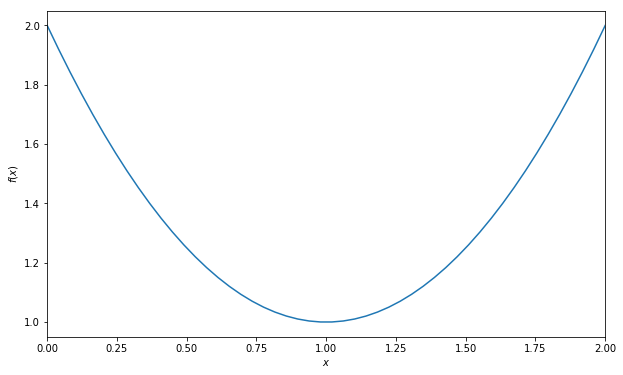

In [11]:
lecture_example.plot()

In [12]:
lecture_example.run(2)

$k$,$a_k$,$b_k$,$f(a_k)$,$f(b_k)$,Uncertainty interval
1,0.7639,1.2361,1.0557,1.0557,"[0.0000, 0.0000]"
2,0.7639,1.2361,1.0557,1.0557,"[0.0000, 0.0000]"


---
## Newtons Method 1D


This method is the most efficient. 

A second order Tayler expansion of the function $f(x)$. Note that $x_0$ is a fixed point. Expanding at $x_0$ we get a second-order polynomial.

$$
f(x) = f(x) + \frac{1}{1!} f'(x_0)(x-x_0) + \frac{1}{2!} f^{''}(x_0)(x-x_0)^2
$$

Cosine or Logarithm functions are implemented in the computer as Taylor approximations because in the computer we only have add and mul instructions. 

The idea in Newtons Method is to make an approximation of the function $f(x)$ and find the minimum of the approximated function $q$. This can be done by taking the derivative of $q(x)$ and solving it for when $q'(x) = 0$.

We can derive the Newton Formula:

<img src="figures/lecture-07/newtons-formula.png" width="200" />


---
<img src="figures/lecture-07/example-7.4.png" width="600" />


The function above is complicated. Finding the local minimiser i.e., the solution to $f'(x)=0$ is really difficult. A better way to use the Newton's method to find a solution iteratively. This method requires first derivative and the second derivative of the function:


$$
f'(x) = x-\cos(x) \\
f^{''}(x) = 1 + \sin(x)
$$

Our update method for finding the extreme point becomes as follows:

$$
x^{(k+1)} = x^{(k)} - \frac{x^{(k)} - \cos( x^{(k)} )}{1 + \sin( x^{(k)} )}
$$

In [13]:
def create_example_74():
    x = sy.symbols('x')
    f = 1/2 * x**2 - sy.sin(x)
    return NewtonSearch(f, x)
ex74 = create_example_74()

Since our starting point is $0.5$, let us plot the function around that region:

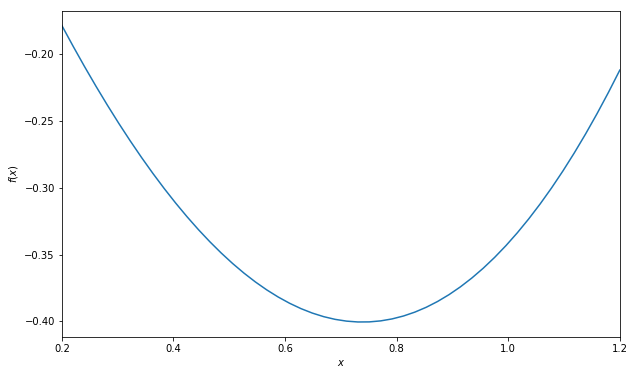

In [14]:
ex74.plot(xlimit=(0.2, 1.2))

We can run the algorithm:

In [15]:
result = ex74.run(starting_point=0.5, epsilon=10**(-5))

Iteration  1: x(k)=0.7552224171056364
Iteration  2: x(k)=0.7391416661498792
Iteration  3: x(k)=0.7390851339208068
Iteration  4: x(k)=0.7390851332151607
 Stopping condition reached!


In [16]:
result

The algorithm converges when $x_k = 0.739$

It is important to find a good starting point. If the starting point is bad then the method may not converge. Let us see what happens, when we have a bad starting point.

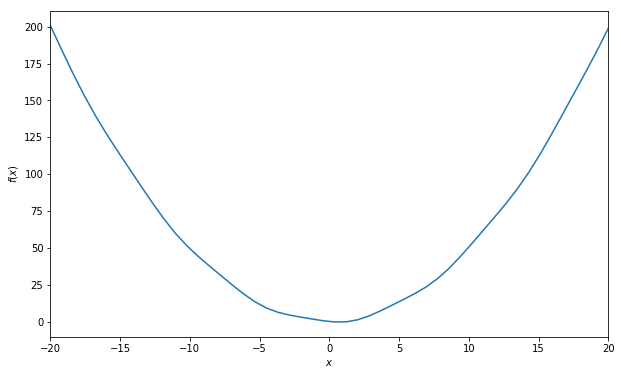

In [17]:
ex74.plot(xlimit=(-20, 20))

In [18]:
ex74.run(starting_point=8, epsilon=10**(-5))

Iteration  1: x(k)=3.905463459065606
Iteration  2: x(k)=-11.105750472107161
Iteration  3: x(k)=-5.480845900820577
Iteration  4: x(k)=-1.8881001310342538
Iteration  5: x(k)=29.684359567498745
Iteration  6: x(k)=-2284.5938245028065
Iteration  7: x(k)=-866.0171565651744
Iteration  8: x(k)=-403.5201131016982
Iteration  9: x(k)=26165.809645458077
Iteration 10: x(k)=8639.891506265605
Iteration 11: x(k)=2840.599433148386
Iteration 12: x(k)=1025.320876017047
Iteration 13: x(k)=490.80218833141294
Iteration 14: x(k)=194.64110185608217
Iteration 15: x(k)=-29.80541925966034
Iteration 16: x(k)=-14.91669092731878
Iteration 17: x(k)=34.30811522155956
Iteration 18: x(k)=6.0145415699482
Iteration 19: x(k)=-0.8607310367681738
Iteration 20: x(k)=5.397999680330236
 Stopping condition never reached!


From the output, we can see that the algorithm fluctuates between the two walls and does not converge after 20 iterations.

---
### Tangent method for root finding in $g(x)$

Newton's method can be used to find intersection with the $x$-axis. 


<img src="figures/lecture-07/newtons-zero-finding.png" width="600" />



Notice that the only difference between the root finding and finding the minimum is the ratio in the update formula.

<img src="figures/lecture-07/figure-7.8.png" width="600" />


---
<img src="figures/lecture-07/example-7.5.png" width="600" />


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from func import Func
from search1d import GoldenSectionSearch, FibonacciSearch, NewtonSearch

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

In [20]:
def create_example_75():
    x = sy.symbols('x')
    f = x**3 - 12.2*x**2 + 7.45*x + 42
    return NewtonSearch(f, x)
ex75 = create_example_75()

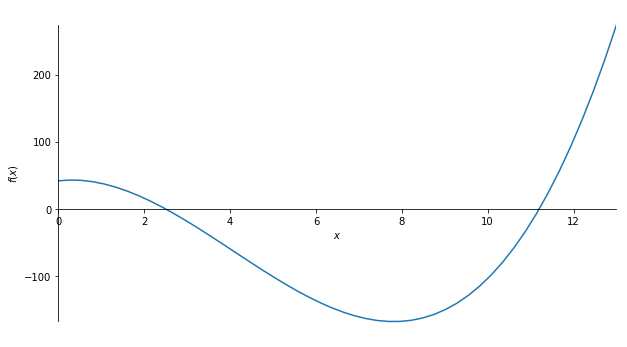

In [21]:
ex75.plot(xlimit=(0, 13), show_spines=True)

From the plot, we can see that if our starting point is $x=12$ then we should find a root around $x=11$.

In [22]:
ex75.find_root(starting_point=12)

Iteration  1: x(k)=11.300375042618478
Iteration  2: x(k)=11.201895469742569
Iteration  3: x(k)=11.200000695476783
Iteration  4: x(k)=11.200000000000093
 Stopping condition reached!


In [23]:
result = ex75.evaluate(11.200000000000093)
result

In [24]:
# Above is same as zero. It is more clear if we 
# suppress scientific notation in Python
'%f' % result

'0.000000'

Newton's method of tangents may fail if the first approximation to the root
is such that the ratio $g(x^{(0)})/g'(x^{(0)})$ is not small enough.

<img src="figures/lecture-07/figure-7.9.png" width="600" />



---
## Secant Method

The Newton's method requires to find the derivative of the function. Some functions like $f(x)=\sin(\cos(e^x))$ where the derivative is complicated $f'(x) = -e^x \sin(e^x) \cos(\cos(e^x))$. The Secant method uses a **secant line** instead of a tangent line to find the root. So what is the difference between a tangent line and secant line? A tangent line is a line that intersects a function at one point whereas a secant line intersects the function at two differenet points.

\begin{align}
x^{(k+1)} = x^{(k)} - \frac{x^{(k)} - \cos( x^{(k)} )}{1 + \sin( x^{(k)} )}
\end{align}

One of the problems with secant method is that we risk dividing by zero if we choose two points that never intersects the $x$-axis.

In this method, we approximate the derivative of the given function in case, we cannot the derivative is not available.

### Minimisation of $f(x)$

<img src="figures/lecture-07/secant-method.png" width="600" />


We can approximate the derivative of the function:

$$
f'(x) = \frac{ f(x^{k}) - f(x^{k-1}) }{x^{k} - x^{k-1}} \\\\
f''(x) = \frac{ f'(x^{k}) - f'(x^{k-1}) }{x^{k} - x^{k-1}} \\
$$

In this way, we don't need the derivative or the second derivative. 

The starting point is always tricky. If a bad starting point is chosen we may end up in a situation where it does not converge.

### Secant method to find roots

<img src="figures/lecture-07/secant-method-root.png" width="600" />




<img src="figures/lecture-07/figure-7.10.png" width="600" />


<img src="figures/lecture-07/example-7.6.png" width="600" />


<img src="figures/lecture-07/example-7.6-result.png" width="600" />


<img src="figures/lecture-07/example-7.7-a.png" width="600" />
<img src="figures/lecture-07/example-7.7-b.png" width="600" />


We cannot use a linear method. Therefore, we need to use the Secant method or Newton Method.  

Typically, in Deep Learning, Newton is not used because $f''$ is difficult to compute. Also, the Newton method is more suspetible to noise in the data.